# ZSU - project 2
### Tomas Bezdek - PIP0015
[Data source](https://www.kaggle.com/ainslie/credit-card-data-clustering-analysis)

## Description

This case requires to develop a customer segmentation to define marketing strategy. The sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

#### Following is the Data Dictionary for Credit Card dataset:

- CUSTID: Identification of Credit Card holder (Categorical)

- BALANCE: Balance amount left in their account to make purchases

- BALANCEFREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

- PURCHASES: Amount of purchases made from account

- ONEOFFPURCHASES: Maximum purchase amount done in one-go

- INSTALLMENTSPURCHASES: Amount of purchase done in installment

- CASHADVANCE: Cash in advance given by the user

- PURCHASESFREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

- ONEOFFPURCHASESFREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

- PURCHASESINSTALLMENTSFREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

- CASHADVANCEFREQUENCY: How frequently the cash in advance being paid

- CASHADVANCETRX: Number of Transactions made with "Cash in Advanced"

- PURCHASESTRX: Numbe of purchase transactions made

- CREDITLIMIT: Limit of Credit Card for user

- PAYMENTS: Amount of Payment done by user

- MINIMUM_PAYMENTS: Minimum amount of payments made by user

- PRCFULLPAYMENT: Percent of full payment paid by user

- TENURE: Tenure of credit card service for user

In [2]:
import numpy as np
import pandas as pd
import sklearn.preprocessing, sklearn.cluster, sklearn.metrics
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('CC_GENERAL.csv', sep=',')
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [5]:
df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [6]:
df.shape

(8950, 18)

In [4]:
df.isna().sum().sort_values(ascending=False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
CUST_ID                               0
BALANCE                               0
PRC_FULL_PAYMENT                      0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
CASH_ADVANCE_FREQUENCY                0
PURCHASES_INSTALLMENTS_FREQUENCY      0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_FREQUENCY                   0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
BALANCE_FREQUENCY                     0
TENURE                                0
dtype: int64

In [8]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [9]:
df['MINIMUM_PAYMENTS'].describe()

count     8637.000000
mean       864.206542
std       2372.446607
min          0.019163
25%        169.123707
50%        312.343947
75%        825.485459
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64

<AxesSubplot:ylabel='MINIMUM_PAYMENTS'>

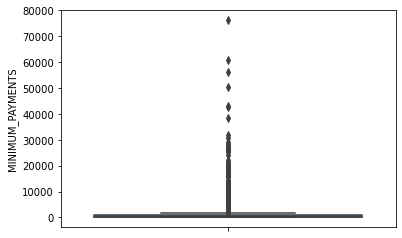

In [10]:
plt.title = 'MINIMUM_PAYMENTS'
sns.boxplot(data=df, y='MINIMUM_PAYMENTS')

With the missing values, we could do two things, we could drop them or replace them with median/mean, in this case we will drop the record where CREDIT_LIMIT is Nan, because it is just one record from 8500. We will replace MINIMUM_PAYMENTS by median, because as we see from the plot above, the distribution of the data is not optimal for replacing by mean.

In [5]:
df.MINIMUM_PAYMENTS.fillna(df.MINIMUM_PAYMENTS.median(), inplace=True)
df.dropna(subset=['CREDIT_LIMIT'], inplace=True)

In [6]:
df.CUST_ID.unique().shape[0]

8949

Right now we have to scale the data. We will print the barplots for each attribute, and find out which scaling will be optimal. Also, we will not use CUST_ID for clustering, because it is unique identification of customer, and it will not affect the clustering.

In [12]:
df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

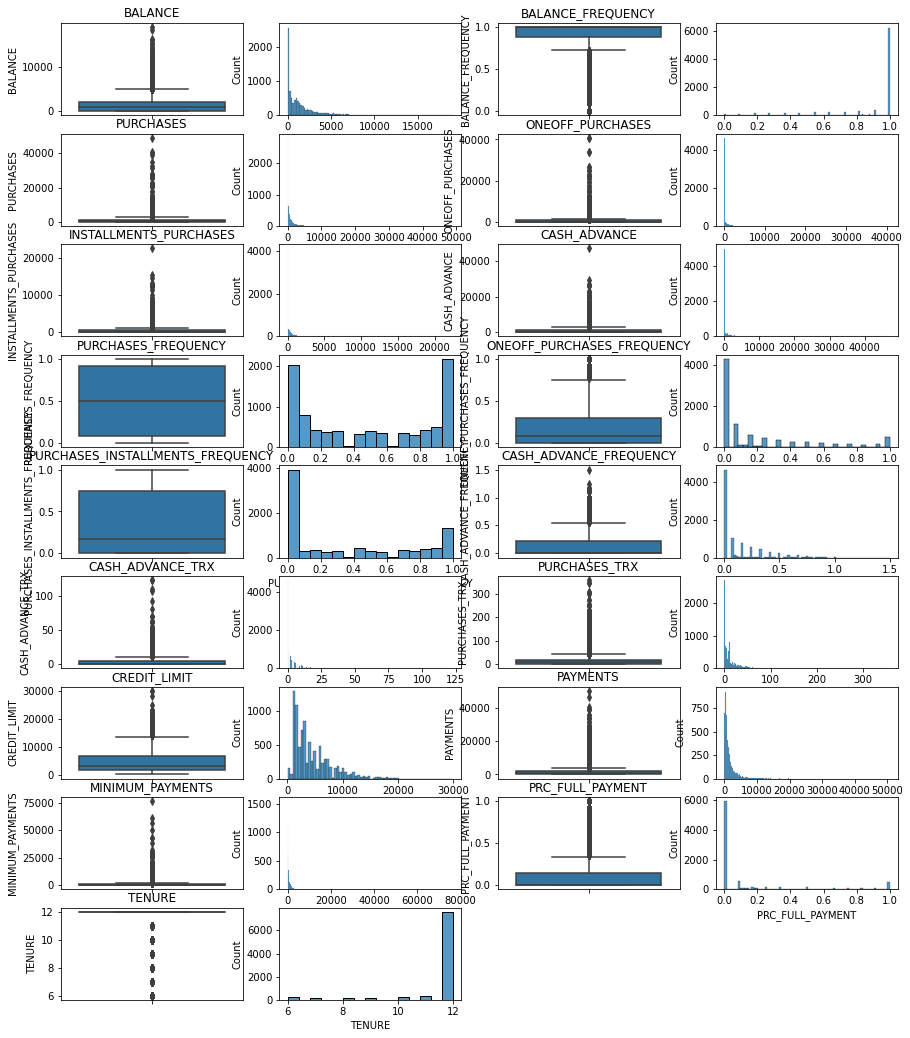

In [13]:
plt.figure(figsize=(15,20))
for i, col in enumerate(df.loc[:,df.columns!='CUST_ID'].columns):
    if df[col].dtype != object:
        ax = plt.subplot(10,4,2*i+1)
        sns.boxplot(data=df, y = col, ax = ax)
        ax.set_title(col)
        ax = plt.subplot(10,4,2*i+2)
        sns.histplot(data=df,x=col, ax=ax)
plt.show()

Now, we could decide which scaler we will use for which attribute.

As we could see, some attributes (balance frequency, purchases frequency, one off purchases frequency, purchases installments frequency, prc full payment) are already between 0 and 1. Due to the big number of outliners in other attributes, we will use robust scaler for them.

In [7]:
scaled_data = df.loc[:,df.columns!='CUST_ID']
robust_scaler = sklearn.preprocessing.RobustScaler()
columns = df.columns
scaled_columns = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
                  'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
                  'MINIMUM_PAYMENTS', 'TENURE']
scaled_data.loc[:,scaled_columns] = robust_scaler.fit_transform(scaled_data[scaled_columns])

C:\Users\tomuz\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


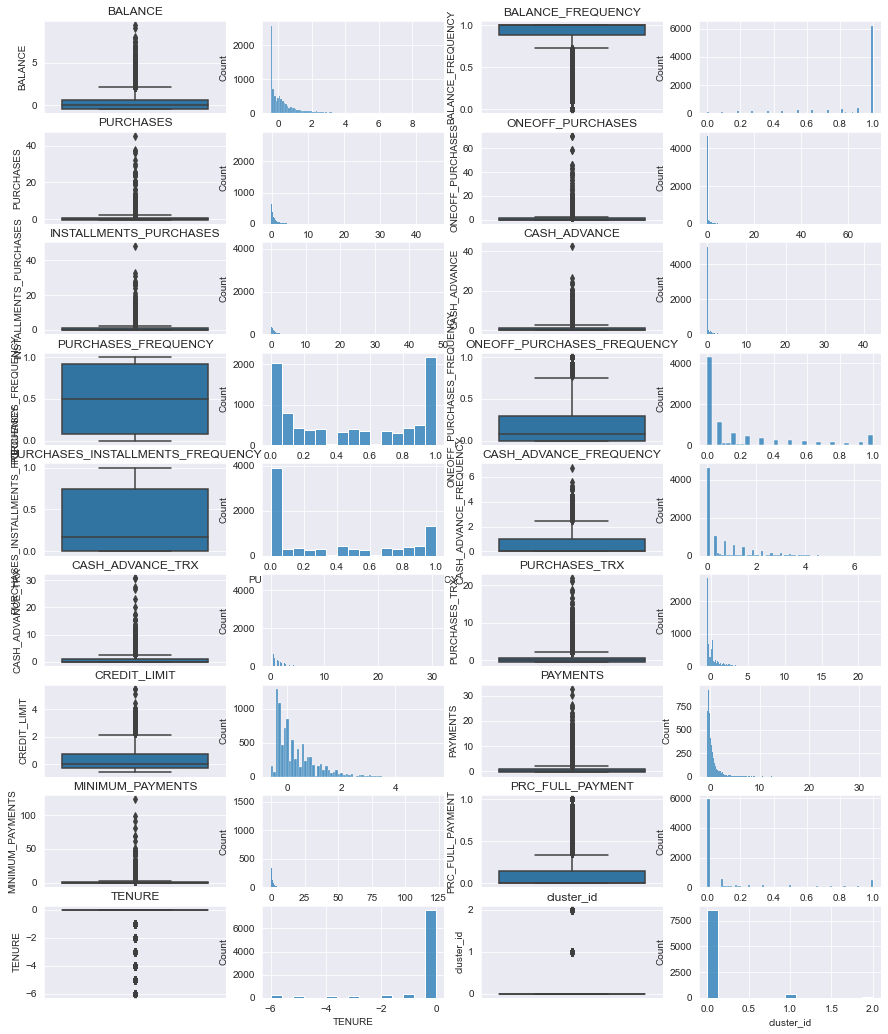

In [50]:
plt.figure(figsize=(15,20))
for i, col in enumerate(scaled_data.loc[:,scaled_data.columns!='CUST_ID'].columns):
    if scaled_data[col].dtype != object:
        ax = plt.subplot(10,4,2*i+1)
        sns.boxplot(data=scaled_data, y = col, ax = ax)
        ax.set_title(col)
        ax = plt.subplot(10,4,2*i+2)
        sns.histplot(data=scaled_data,x=col, ax=ax)

plt.show()

### Now, we will use K-Means algorithm

<AxesSubplot:xlabel='k'>

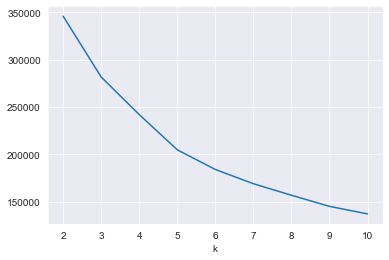

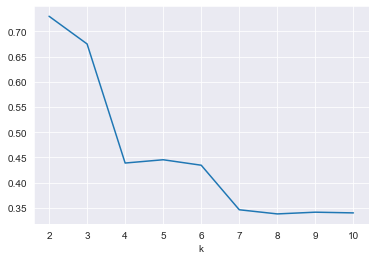

In [24]:
clustering_scores = []
for k in range(2, 11):
    clustering = sklearn.cluster.KMeans(n_clusters=k).fit(scaled_data)
    clustering_scores.append({
        'k': k,
        'sse': clustering.inertia_,
        'silhouette': sklearn.metrics.silhouette_score(scaled_data, clustering.labels_)
    })
df_clustering_scores = pd.DataFrame.from_dict(clustering_scores, orient='columns')
df_clustering_scores = df_clustering_scores.set_index('k')
df_clustering_scores.sse.plot()
plt.figure()
df_clustering_scores.silhouette.plot()

Due to the elbow method, the optimal number of clusters would be 3 or 5, when we use silhouette score as additional criterion, we will use 3 clusters.

In [25]:
clustering = sklearn.cluster.KMeans(n_clusters=3)
clustering.fit(scaled_data)
df['cluster_id'] = clustering.labels_

In [26]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_id
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,0
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [27]:
pd.Series(clustering.labels_).value_counts()

0    8533
2     357
1      59
dtype: int64

### Clusters exploration

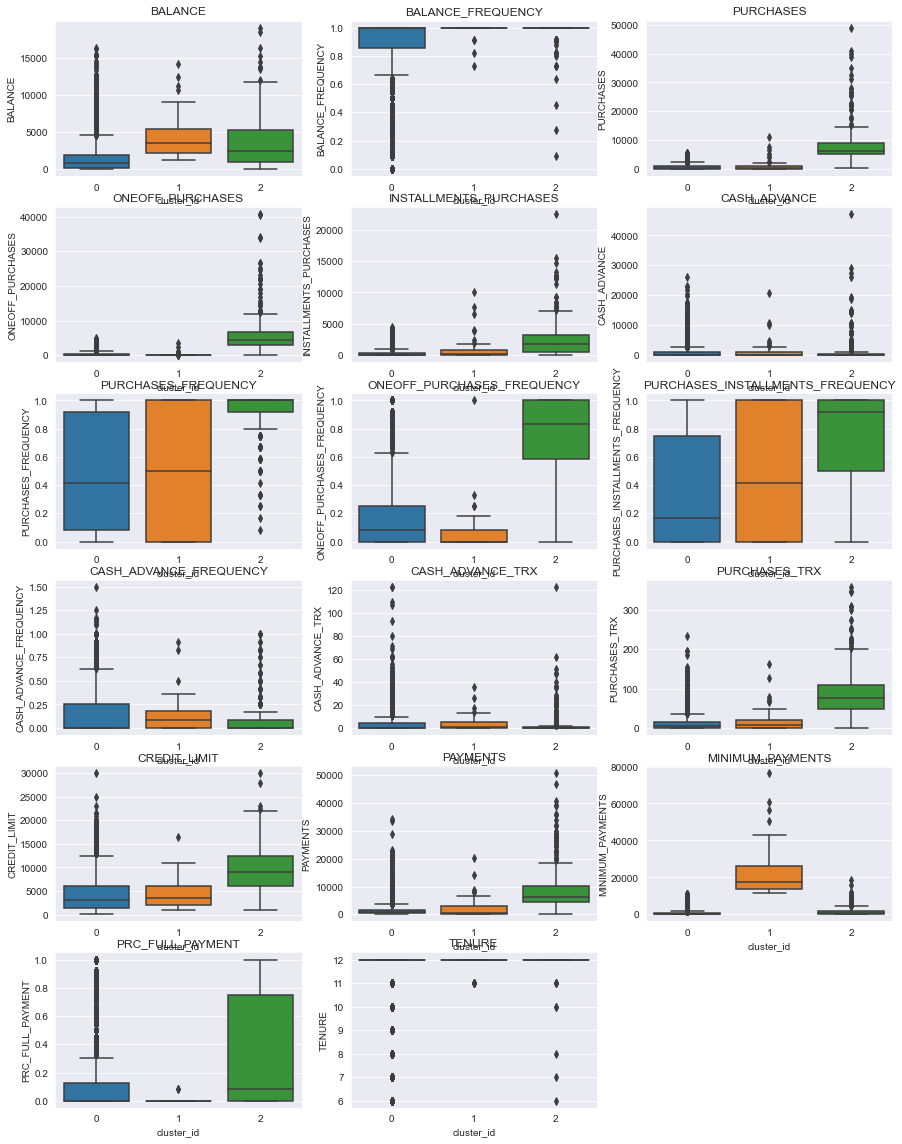

In [28]:
plt.figure(figsize=(15,20))
for i, col in enumerate(df.loc[:,(df.columns!='CUST_ID') & (df.columns!='cluster_id')].columns):
    if scaled_data[col].dtype != object:
        ax = plt.subplot(6,3,i+1)
        sns.boxplot(data=df, y = col, x = 'cluster_id', ax = ax)
        ax.set_title(col)

plt.show()

From the graphs above, we see which attributes should be deeply explore, in this case, it will be Purchases, One Off Purchases, One Off Purchases Frequency, Purchases Installment Frequency, Purchases Trx, Credit Limit, Payments, Minimum Payments

<AxesSubplot:xlabel='cluster_id', ylabel='PURCHASES'>

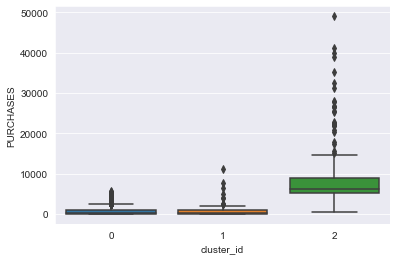

In [30]:
# PURCHASES
sns.boxplot(data=df, y ='PURCHASES', x = 'cluster_id')

ad

<AxesSubplot:xlabel='cluster_id', ylabel='ONEOFF_PURCHASES'>

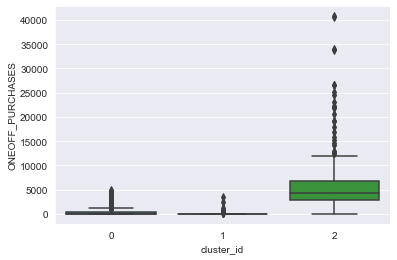

In [41]:
# ONEOFF_PURCHASES
sns.boxplot(data=df, y ='ONEOFF_PURCHASES', x = 'cluster_id')

<AxesSubplot:xlabel='cluster_id', ylabel='ONEOFF_PURCHASES_FREQUENCY'>

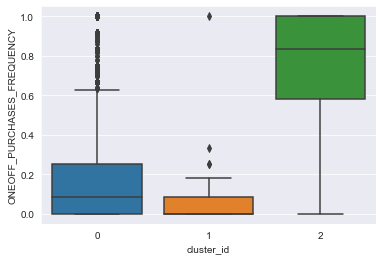

In [32]:
# ONEOFF_PURCHASES_FREQUENCY
sns.boxplot(data=df, y ='ONEOFF_PURCHASES_FREQUENCY', x = 'cluster_id')

<AxesSubplot:xlabel='cluster_id', ylabel='PURCHASES_INSTALLMENTS_FREQUENCY'>

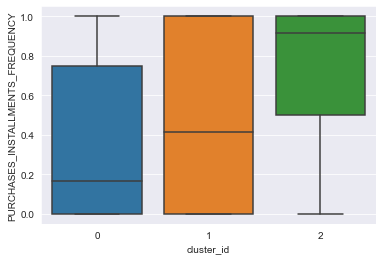

In [34]:
# PURCHASES_INSTALLMENTS_FREQUENCY
sns.boxplot(data=df, y ='PURCHASES_INSTALLMENTS_FREQUENCY', x = 'cluster_id')

<AxesSubplot:xlabel='cluster_id', ylabel='PURCHASES_TRX'>

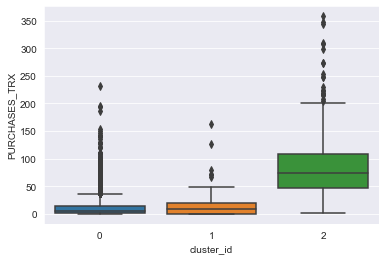

In [35]:
# PURCHASES_TRX
sns.boxplot(data=df, y ='PURCHASES_TRX', x = 'cluster_id')

<AxesSubplot:xlabel='cluster_id', ylabel='CREDIT_LIMIT'>

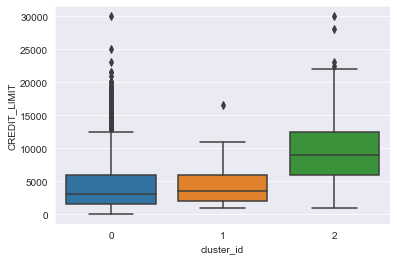

In [36]:
# CREDIT_LIMIT
sns.boxplot(data=df, y= 'CREDIT_LIMIT', x = 'cluster_id')

<AxesSubplot:xlabel='cluster_id', ylabel='PAYMENTS'>

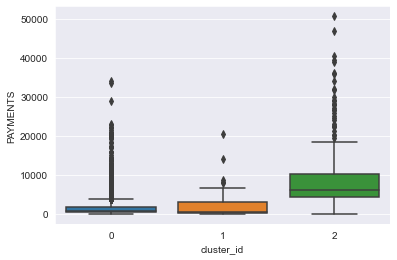

In [37]:
# PAYMENTS
sns.boxplot(data=df, y='PAYMENTS', x='cluster_id')

<AxesSubplot:xlabel='cluster_id', ylabel='MINIMUM_PAYMENTS'>

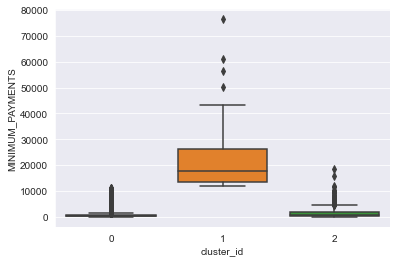

In [38]:
# MINIMUM_PAYMENTS
sns.boxplot(data=df, y='MINIMUM_PAYMENTS', x='cluster_id')

From the graphs above, we could say that the clusters are divided based on following "rules".
Description: &uarr; means higher than others, &darr; means lower than others, &harr; means same as others(most) or in the middle

| Clusters                         | Cluster 0 | Cluster 1 | Cluster 2 |
|:---------------------------------|:----------|:----------|:----------|
| PURCHASES                        | &harr;    | &harr;    | &uarr;    |
| ONEOFF_PURCHASES                 | &harr;    | &harr;    | &uarr;    |
| ONEOFF_PURCHASES_FREQUENCY       | &harr;    | &harr;    | &uarr;    |
| PURCHASES_INSTALLMENTS_FREQUENCY | &darr;    | &harr;    | &uarr;    |
| PURCHASES_TRX                    | &harr;    | &harr;    | &uarr;    |
| CREDIT_LIMIT                     | &harr;    | &harr;    | &uarr;    |
| PAYMENTS                         | &harr;    | &harr;    | &uarr;    |
| MINIMUM_PAYMENTS                 | &harr;    | &uarr;    | &harr;    |

#### Now we could say which customers belong to which cluster.
|     Cluster      | Description                                                                                                                                                                                                                                           |
|:----------------:|:------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|    Cluster 0     | Customers that have lower PURCHASES_INSTALLMENTS_FREQUENCY than other customers, they also have lover MINIMUM_PAYMENTS than Cluster 1 but mostly similar to Cluster 2. Rest of explored attributes are similar to Cluster 0.                          |
|    Cluster 1     | Customers that have highest  MINIMUM_PAYMENTS from all customers, they also have  PURCHASES_INSTALLMENTS_FREQUENCY higher than Cluster 0 but lower than Cluster 2.  Rest of explored attributes are similar to Cluster 0.                             |
|    Cluster 2     | Customers that have higher PURCHASES, ONEOFF_PURCHASES, ONEOFF_PURCHASES_FREQUENCY,  PURCHASES_INSTALLMENTS_FREQUENCY,  PURCHASES_TRX, CREDIT_LIMIT, PAYMENTS than other customers. These customers also have quite usual height of MINIMUM_PAYMENTS. |

### Summary for K-Means
As we see above, by using 3 clusters, the clustering end up quite well. We get three clusters, where two of them are similar in most of the attributes. In cluster 0 are probably average customers, also because most of the customers ends up in cluster 0 (8533). In cluster 1 are customers that are almost average, but have higher MINIMUM_PAYMENTS, and a bit higher PURCHASE_INSTALLMENTS_FREQUENCY (just 59 customers). In cluster 2 are customers that overall use the card more and spend more (around 357 customers).

We see that the results are not perfect (one cluster with almost everyone and two tiny clusters), but after exploration, we see that the result makes sense, and it might be useful.

## Different clustering algorithm

As other algorithm, we will use Agglomerative clustering

First of all, we will try to visualize dendrogram for different linkages, to find out which one will be ideal for our data.

In [8]:
# Function for dendrogram visualization
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    # Credit to https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

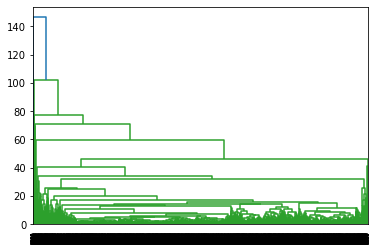

In [17]:
# Complete linkage
clustering = AgglomerativeClustering(linkage='complete', distance_threshold=0, n_clusters=None)
clustering = clustering.fit(scaled_data)
plot_dendrogram(clustering)

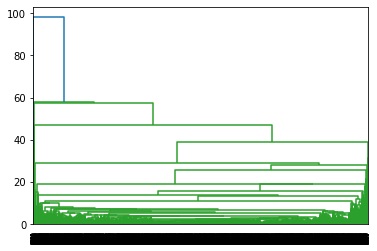

In [17]:
# Average linkage
clustering = AgglomerativeClustering(linkage='average', distance_threshold=0, n_clusters=None)
clustering = clustering.fit(scaled_data)
plot_dendrogram(clustering)

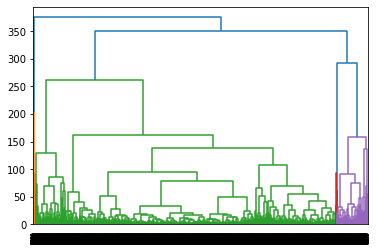

In [16]:
# Ward linkage
clustering = AgglomerativeClustering(linkage='ward', distance_threshold=0, n_clusters=None)
clustering = clustering.fit(scaled_data)
plot_dendrogram(clustering)

Based on the dendrograms above, we will use average linkage with two clusters, because it looks as a best solution.

In [20]:
#Final aglomerative clustering - average linkage, 2 clusters
clustering = AgglomerativeClustering(linkage='average', n_clusters=2)
clustering = clustering.fit(scaled_data)
pd.Series(clustering.labels_).value_counts()

0    8945
1       4
dtype: int64

As we could see, this clustering does not make a sense, because almost all customers are in one cluster, and just 4 from 8949 customers are in the second one. Therefor, we will use different linkage and will try to find out whether we could get better results.

Let's try ward linkage and 5 clusters.

In [22]:
#Final aglomerative clustering - ward linkage, 5 clusters
clustering = AgglomerativeClustering(linkage='ward', n_clusters=5)
clustering = clustering.fit(scaled_data)
pd.Series(clustering.labels_).value_counts()

1    7249
2     827
4     783
0      67
3      23
dtype: int64

In [25]:
df.loc[:,'aglomerative_cluster_id'] = clustering.labels_

This clustering looks much better than the one with average linkage, now we will explore clusters.

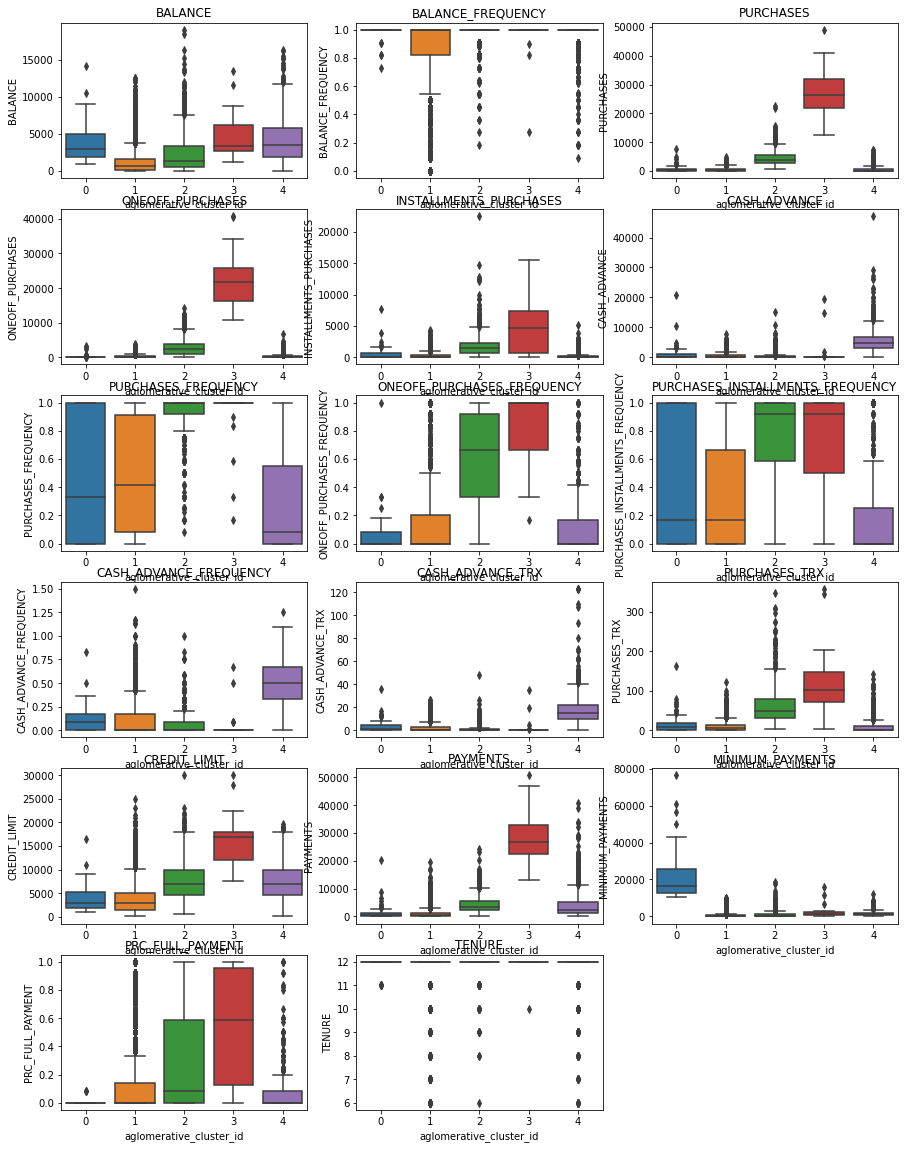

In [28]:
plt.figure(figsize=(15,20))
for i, col in enumerate(df.loc[:,(df.columns!='CUST_ID') & (df.columns!='cluster_id') & (df.columns!='aglomerative_cluster_id')].columns):
    if scaled_data[col].dtype != object:
        ax = plt.subplot(6,3,i+1)
        sns.boxplot(data=df, y = col, x = 'aglomerative_cluster_id', ax = ax)
        ax.set_title(col)

plt.show()

As we could see on the graphs above, there is almost no difference in attributes BALANCE, BALANCE_FREQUENCY and nothing really observable for TENURE.
For the rest of the attributes, we create the same table as we did above.



| Clusters                         | Cluster 0 | Cluster 1 | Cluster 2 | Cluster 3 | Cluster 4 |
|:---------------------------------|:----------|:----------|:----------|:----------|:----------|
| PURCHASES                        | &darr;    | &darr;    | &harr;    | &uarr;    | &darr;    |
| ONEOFF_PURCHASES                 | &darr;    | &darr;    | &harr;    | &uarr;    | &darr;    |
| INSTALLMENTS_PURCHASES           | &darr;    | &darr;    | &harr;    | &uarr;    | &darr;    |
| CASH_ADVANCE                     | &harr;    | &harr;    | &harr;    | &harr;    | &uarr;    |
| PURCHASES_FREQUENCY              | &harr;    | &harr;    | &uarr;    | &uarr;    | &darr;    |
| ONEOFF_PURCHASES_FREQUENCY       | &darr;    | &darr;    | &harr;    | &uarr;    | &darr;    |
| PURCHASES_INSTALLMENTS_FREQUENCY | &harr;    | &harr;    | &uarr;    | &uarr;    | &darr;    |
| CASH_ADVANCE_FREQUENCY           | &harr;    | &harr;    | &harr;    | &harr;    | &uarr;    |
| CASH_ADVANCE_TRX                 | &harr;    | &harr;    | &harr;    | &harr;    | &uarr;    |
| PURCHASES_TRX                    | &darr;    | &darr;    | &harr;    | &uarr;    | &darr;    |
| CREDIT_LIMIT                     | &darr;    | &darr;    | &harr;    | &uarr;    | &harr;    |
| PAYMENTS                         | &harr;    | &harr;    | &harr;    | &uarr;    | &harr;    |
| MINIMUM_PAYMENTS                 | &uarr;    | &harr;    | &harr;    | &harr;    | &harr;    |
| PRC_FULL_PAYMENT                 | &darr;    | &harr;    | &harr;    | &uarr;    | &harr;    |

Now we could describe what type of customers are in which cluster.

|  Cluster  | Description                                                                                                                                                                                                                                    |
|:---------:|:-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Cluster 0 | Customers that have higher MINIMAL_PAYMENTS than others, average PURCHASES_FREQUENCY, but the rest of attributes mostly same or lower than most of the other customers. Only small number of customers (67).                                   |
| Cluster 1 | Customers with similar attributes as the those in cluster 0, but with average MINIMUM_PAYMENTS and average PRC_FULL_PAYMENTS. In this cluster is most of the customers (7249).                                                                 |
| Cluster 2 | Customers that have high PURCHASES_FREQUENCY and PURCHASES_INSTALLMENTS_FREQUENCY. Rest of their attributes have average value. Also quite common customers (827).                                                                             |
| Cluster 3 | Customers that have average CASH_ADVANCE, CASH_ADVANCE_FREQUENCY, CASH_ADVANCE_TRX, MINIMUM_PAYMENTS. The rest of attributes of these customers higher than the others. Just small group of customers (23).                                    |
| Cluster 4 | Customers with high CASH_ADVANCE_FREQUENCY and CASH_ADVANCE_TRX, average CREDIT_LIMIT, PAYMENTS, MINIMUM_PAYMENTS, PRC_FULL_PAYMENTS. Have other attributes lower than other customers. Approximately as many customers as in cluster 2 (783). |

### Summary

As we see above, by using aglomerative clustering, ward linkage and 5 clusters, the clustering end up quite well. We get 5 clusters, one where most of the customers are (cluster 1), than two really tiny clusters containing customers with specific values (cluster 0 and cluster 3). And finally, there are two clusters with around 800 customers each. We could also see that by using different algorithm, we get different optimal number of clusters, than from the K-Means. Overall, we could say that both clustering we made gave us useful information about customers and what habits, they have (as what other customers they use their cards).

To sum up, we see that clustering is not 100% exact science, and it really depends on the algorithms and parameters/metrics we use. To end with somthing positive, results we get might be useful for the credit card company, even though they are not 100% exact.